<a href="https://colab.research.google.com/github/anishdevadiga/Machine_Learning/blob/main/multilinearRegressionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
***MLR on mtcars dataset****
y=-2.47 + -0.01*x1 + 0.29*x2 + -0.01*x3 + 0.01*x4 + 0.42*x5 + 1.53*x6 + -0.22*x7 + -0.23*x8 + -0.12*x9 + 0.77*x10
SSR (Regression sum of squares): 70.67709776629607
SST (Total sum of squares): 80.875
SSE (Error sum of squares): 10.19790223370595
MSE (Mean squared error): 0.31868444480331093
R² Score: 0.8739053819634504


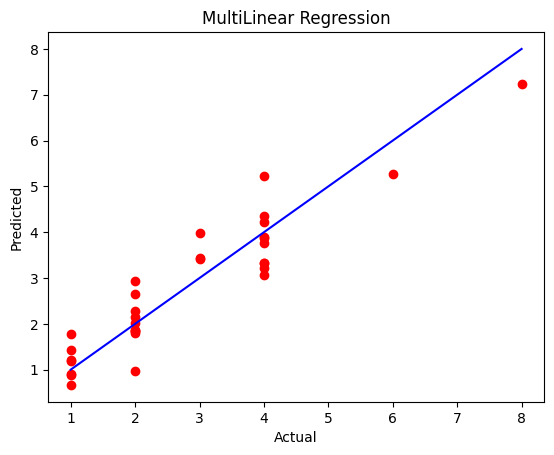

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

# Matrix method by taking entire dataset
def performMultiLinearRegression(df):
    df = df.apply(pd.to_numeric, errors='coerce')
    X = df.iloc[:, :-1].values
    Y = df.iloc[:, -1].values

    # Adding ones column for the intercept
    ones_column = np.ones((X.shape[0], 1))
    X_c = np.c_[ones_column, X]

    Xvalues = np.delete(X_c, --1, axis=1)
    XvaluesTranpose = Xvalues.T
    XmulVal = np.dot(XvaluesTranpose, Xvalues)
    Xinv = np.linalg.inv(XmulVal)

    y_values = np.dot(XvaluesTranpose, Y)
    coef = np.dot(Xinv, y_values)

    y_pred = np.dot(Xvalues, coef)

    # Calculate SSR, SST, SSE
    ssr = np.sum((y_pred - np.mean(Y))**2)
    sst = np.sum((Y - np.mean(Y))**2)
    sse = np.sum((Y - y_pred)**2)

    # Calculate MSE and R^2
    mse = sse / len(Y)
    r2_score = 1 - (sse / sst)

    eqn = "y={:.2f}".format(coef[0])
    for i in range(1, len(coef)):
        eqn += " + {:.2f}*x{}".format(coef[i], i)
    print(eqn)

    # Return the results
    print(f"SSR (Regression sum of squares): {ssr}")
    print(f"SST (Total sum of squares): {sst}")
    print(f"SSE (Error sum of squares): {sse}")
    print(f"MSE (Mean squared error): {mse}")
    print(f"R² Score: {r2_score}")

    plt.scatter(Y,y_pred,color='red')
    plt.plot([min(Y),max(Y)],[min(Y),max(Y)],color='blue')
    plt.title('MultiLinear Regression')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

# Use the function on mtcars dataset
print('***MLR on mtcars dataset****')
mtcars = pd.read_csv('/content/drive/My Drive/mtcars.csv')
performMultiLinearRegression(mtcars)



